@akhil krishna R

# **Introduction to Galaxy Spectroscopy and Redshift Estimation**

Understanding galaxy spectra is fundamental in extragalactic astronomy. By analyzing the light emitted or absorbed by galaxies, we can determine their physical properties, chemical composition, and motion relative to us. One of the most crucial measurements from spectra is the **redshift (z)**, which provides insights into the universe's expansion and the distance of galaxies.

## **What is Spectroscopy?**
Spectroscopy is the study of how light interacts with matter. When we observe a galaxy, we see a **spectrum**—a distribution of light intensity as a function of wavelength. This spectrum contains key **emission** and **absorption** lines, which correspond to specific atomic transitions in elements such as hydrogen, oxygen, sodium, and calcium.

## **Key Spectral Features in Galaxies**
Galaxy spectra contain both:

- **Emission lines** – Produced by hot, ionized gas in star-forming regions (e.g., H-alpha, [O III]).  
- **Absorption lines** – Formed when cooler gas absorbs specific wavelengths of light from stars (e.g., Ca II H & K, Na I D).  

Each element has a characteristic set of spectral lines, which appear at fixed **rest-frame wavelengths** when measured in a laboratory. However, in galaxies moving away from us due to the expansion of the universe, these lines appear **shifted to longer (redder) wavelengths**—a phenomenon known as **redshift**.

## Redshift 
Redshift (z) is defined as:

$$ z = \frac{\lambda_{\text{obs}} - \lambda_{\text{rest}}}{\lambda_{\text{rest}}} $$


where $$\lambda_{\text{obs}}$$ is the observed wavelength of a spectral line, 
and $$\lambda_{\text{rest}}$$ is its rest-frame wavelength. 
A higher redshift means the galaxy is farther away and moving faster due to cosmic expansion.


## **Workshop Demonstration: Estimating Redshift**
In this session, we will:

✅ Download the SDSS spectrum.  
✅ Identify key spectral lines in the observed data.  
✅ Compare them to their rest-frame positions.  
✅ Measure the shift of an absorption line (e.g., Ca II K) and calculate the redshift.  
✅ Apply this shift to correct the spectrum and compare it with standard spectral features.  

By the end of this exercise, you will gain hands-on experience in **analyzing galaxy spectra, identifying spectral lines, and estimating redshifts**—essential skills for observational astronomy!


# import all the necessary packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy.io import fits
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.modeling import models, fitting
import pandas as pd

# Download the SDSS spectrum

In [2]:
coords = SkyCoord.from_name("SDSS J121602.44+060418.0")
query_result = SDSS.query_region(coords, spectro=True)

if query_result is None:
    raise ValueError("No SDSS spectra found")

In [3]:
query_result

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64
184.010200451828,6.07166806853148,1237654606946762876,2126,301,6,432,0.1013739,844,52378,368,950360716341176320,26


# Read and plot the spectrum

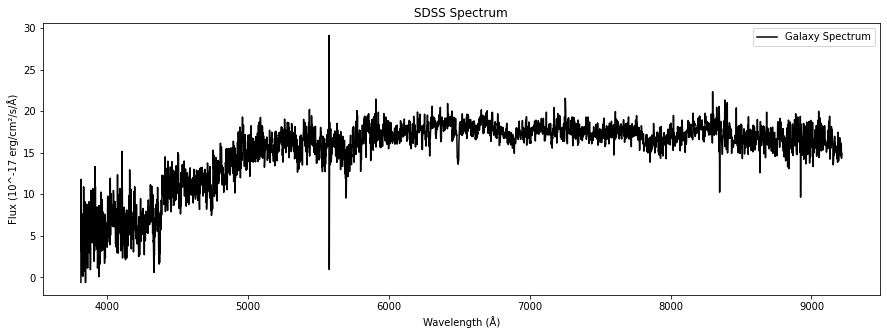

In [4]:
# Get the first spectrum
spec_id = query_result[0]['specobjid']
hdulist = SDSS.get_spectra(matches=query_result)[0]

# Read spectrum data
spec_data = hdulist[1].data
wavelength = 10**spec_data['loglam']  # Convert log wavelength to linear scale
flux = spec_data['flux']

# Step 2: Plot the spectrum
plt.figure(figsize=(15, 5))
plt.plot(wavelength, flux, label='Galaxy Spectrum', color='k',ls='-')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux (10^-17 erg/cm²/s/Å)')
plt.title('SDSS Spectrum')
plt.legend()
#plt.grid()
plt.show()

# Standard emission and absorption lines

In [5]:
data = {
    "Element": ["H-alpha", "H-beta", "H-gamma", "H-delta", "[O II]", "[O III]", "[O III]", "[S II]", "[S II]", "[N II]", "[N II]", "Ca II K", "Ca II H", "Mg I", "Na I D"],
    "Type": ["Emission"] * 11 + ["Absorption"] * 4,
    "Wavelength": [6563, 4861, 4341, 4102, 3727, 4959, 5007, 6717, 6731, 6548, 6584, 3933, 3968, 5172, 5892]
}
line_df = pd.DataFrame(data)
# Sort by wavelength
line_df = line_df.sort_values(by="Wavelength")
line_df

,Element,Type,Wavelength
4,[O II],Emission,3727
11,Ca II K,Absorption,3933
12,Ca II H,Absorption,3968
3,H-delta,Emission,4102
2,H-gamma,Emission,4341
1,H-beta,Emission,4861
5,[O III],Emission,4959
6,[O III],Emission,5007
13,Mg I,Absorption,5172
14,Na I D,Absorption,5892


In [18]:
data = {
    "Element": [ "Ca II K", "Ca II H", "Mg I", "Na I D"],
    "Wavelength": [ 3933, 3968, 5172, 5892]
}
line_df = pd.DataFrame(data)
# Sort by wavelength
line_df = line_df.sort_values(by="Wavelength")
line_df

,Element,Wavelength
0,Ca II K,3933
1,Ca II H,3968
2,Mg I,5172
3,Na I D,5892


# Plot the spectrum and overlay the standard lines

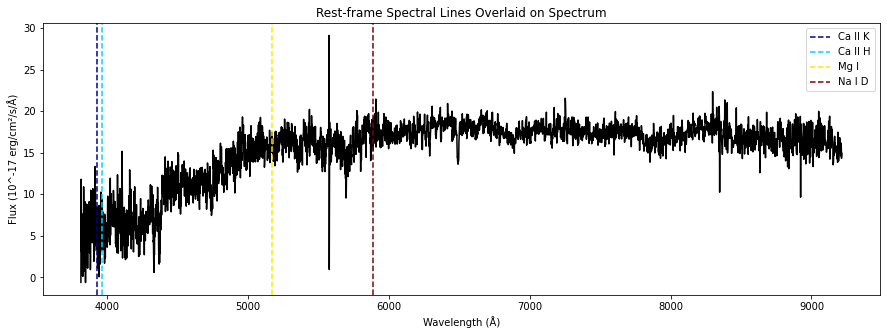

In [19]:
#%matplotlib qt
# Define a colormap with unique colors for each spectral line
unique_elements = line_df["Element"].unique()
colors = plt.cm.get_cmap("jet", len(unique_elements))  # Use a qualitative colormap

# Create a dictionary to map each element to a unique color
element_colors = {element: colors(i) for i, element in enumerate(unique_elements)}

# Plot the spectrum
plt.figure(figsize=(15, 5))
plt.plot(wavelength, flux, label="Galaxy spectrum", color="black")

# Dictionary to store legend handles (to avoid duplicates)
legend_handles = {}

# Add vertical lines and labels
for _, row in line_df.iterrows():
    color = element_colors[row["Element"]]  # Assign a unique color
    plt.axvline(x=row["Wavelength"], linestyle="--", lw=1.5, color=color)
    
    # Store only unique labels
    if row["Element"] not in legend_handles:
        legend_handles[row["Element"]] = plt.Line2D([0], [0], linestyle="--", color=color, label=row["Element"])

# Labeling and title
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (10^-17 erg/cm²/s/Å)")
plt.title("Rest-frame Spectral Lines Overlaid on Spectrum")
plt.legend(handles=list(legend_handles.values()), loc="upper right", fontsize=10)  # Sorted legend
#plt.grid()
plt.show()


# Calculate the redshift

In [33]:

caK_rest = 3933  # Rest-frame wavelength of Ca II K in Å
caK_obs = 4328   # Observed peak of Ca II K

# Calculate redshift
z = (caK_obs - caK_rest) / caK_rest

# Introduce 5% uncertainty in observed wavelength
obs_error = 0.05 * caK_obs  # 5% of observed wavelength

# Propagate error in redshift calculation
z_error = obs_error / caK_rest

# Print results
print(f"Estimated Redshift: {z:.2f} ± {z_error:.2f}")

c = 299792  # Speed of light in km/s

# Compute velocity using the classical approximation
velocity = c * z

# Propagate uncertainty in velocity
velocity_error = c * z_error

# Print results
print(f"Estimated velocity of the galaxy: {velocity:.1f} ± {velocity_error:.1f} km/s")



Estimated Redshift: 0.10 ± 0.06
Estimated velocity of the galaxy: 30108.8 ± 16495.0 km/s


# Shift the spectrum to rest-frame 

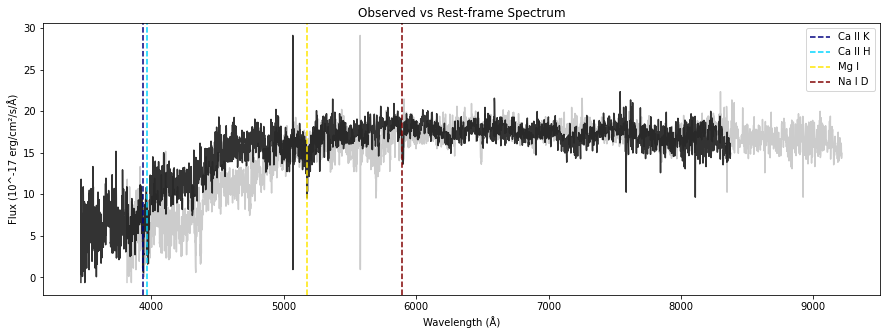

In [21]:
# Shift the spectrum to the rest-frame
wavelength_rest = wavelength / (1 + z)

# Define a colormap with unique colors for each spectral line
unique_elements = line_df["Element"].unique()
colors = plt.cm.get_cmap("jet", len(unique_elements))  # Using a qualitative colormap

# Create a dictionary to map each element to a unique color
element_colors = {element: colors(i) for i, element in enumerate(unique_elements)}

# Plot the observed and rest-frame spectra
plt.figure(figsize=(15, 5))
plt.plot(wavelength, flux, label="Observed Spectrum", color="black", alpha=0.2)
plt.plot(wavelength_rest, flux, label="Rest-frame Spectrum", color="k", alpha=0.8)

# Sort line_df by wavelength for correct ordering
line_df = line_df.sort_values(by="Wavelength")

# Dictionary to store legend handles (to avoid duplicates)
legend_handles = {}

# Overlay rest-frame spectral lines with unique colors
for _, row in line_df.iterrows():
    color = element_colors[row["Element"]]  # Assign a unique color
    plt.axvline(x=row["Wavelength"], linestyle="--", lw=1.5, color=color)
    
    # Store unique labels for legend
    if row["Element"] not in legend_handles:
        legend_handles[row["Element"]] = plt.Line2D([0], [0], linestyle="--", color=color, label=row["Element"])

# Labels and legend
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (10^-17 erg/cm²/s/Å)")
plt.title("Observed vs Rest-frame Spectrum")
plt.legend(handles=list(legend_handles.values()), loc="upper right", fontsize=10)
#plt.grid()
plt.show()


# For further queries contact Akhil Krishna R, email: akhil.r@res.christuniversity.in